In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv("/kaggle/input/covid19-tweets/covid19_tweets.csv")


In [2]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166651,LynnZ,NaN,UT Austin Alum/Real Estate Developer & Designe...,2015-09-17 02:09:12,28488,18845,160631,False,2020-08-22 00:16:13,@SarahHuckabee @KellyannePolls Snapshot of our...,NaN,Twitter for iPhone,False
166652,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10875,7351,500315,False,2020-08-22 00:16:08,Ignoring your core civic duty to fellow Florid...,['covid19'],Twitter for Android,False
166653,"Farheen Qurashi, MD","Baltimore, MD","(She/Her) Trauma/Critical Care Surgeon. Wife, ...",2020-08-03 12:37:00,35,118,769,False,2020-08-22 00:16:03,"When people around me do wat a mask, it makes ...","['MaskUp', 'COVID19']",Twitter for iPhone,False
166654,Alf O'Kenney,"Montréal, QC",Dans ses écrits / un sage italien / dit que le...,2019-10-08 14:12:37,13,139,101,False,2020-08-22 00:16:00,Stream of #COVID19 thoughts:\n\n• First waves ...,['COVID19'],Twitter for Android,False


In [3]:
import os 
! apt-get update -qq > /dev/null   

# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version
! pip install  nlu==2.5rc1 -qq > /dev/null  

import nlu

debconf: delaying package configuration, since apt-utils is not installed
openjdk version "1.8.0_265"
OpenJDK Runtime Environment (build 1.8.0_265-8u265-b01-0ubuntu2~18.04-b01)
OpenJDK 64-Bit Server VM (build 25.265-b01, mixed mode)


analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


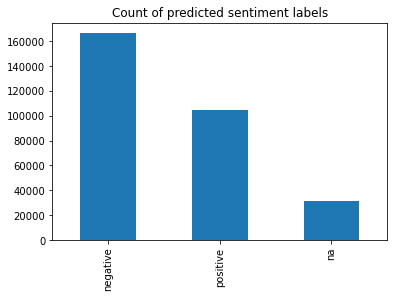

In [4]:
import nlu
sentiment_predictions = nlu.load('sentiment').predict(df)
sentiment_predictions['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

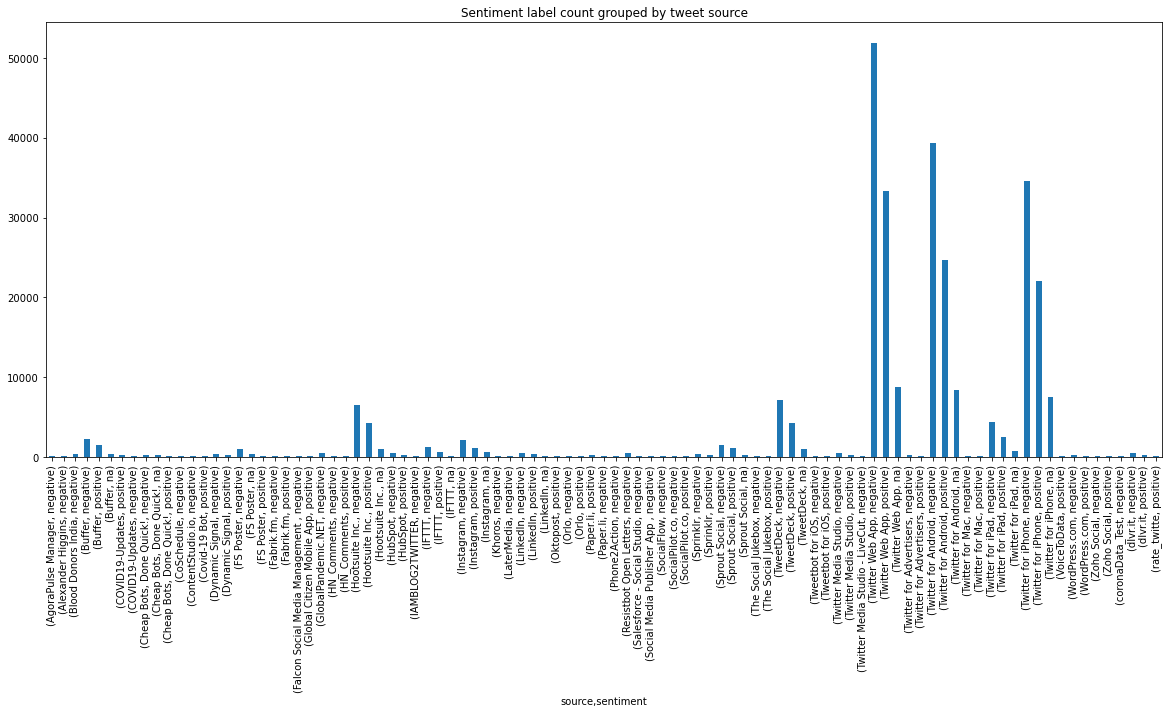

In [8]:
counts = sentiment_predictions.groupby('source')['sentiment'].value_counts()
counts[counts>100].plot.bar(figsize=(20,8), title='Sentiment tweet counts grouped by tweet source')

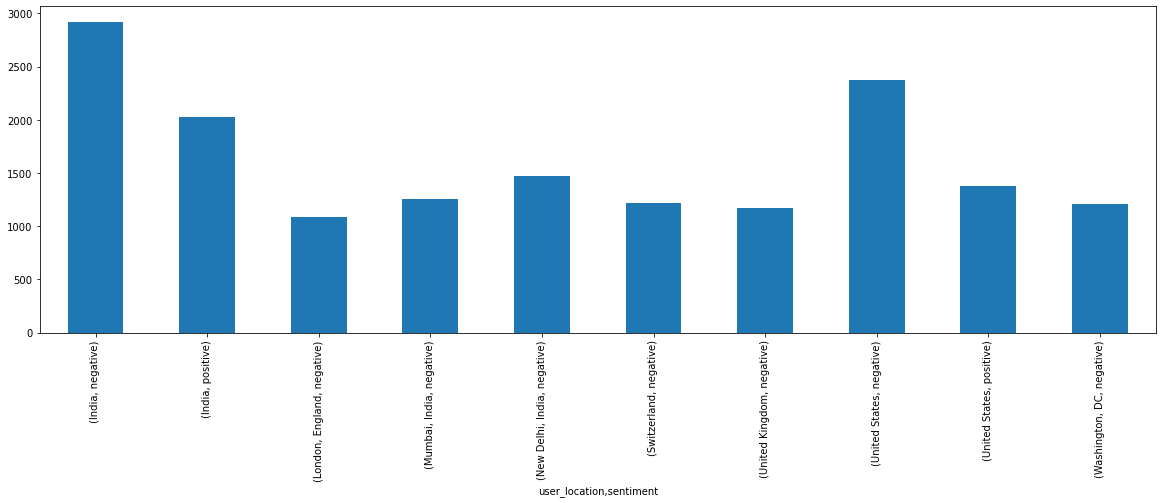

In [10]:
counts = sentiment_predictions.groupby(['user_location'])['sentiment'].value_counts()
counts[counts >1000 ].plot.bar(figsize=(20,6), title='Sentiment tweet counts grouped by user location')